In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

121

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,emaar mgf emerald floors premier,sector 65,2.85,14430.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3,"servant room,study room",3.0,North,1 to 5 Year Old,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2753,1.25,2120.0,Super Built up area 2120(196.95 sq.m.)Built Up area: 1616 sq.ft. (150.13 sq.m.)
2473,0.95,1452.0,Super Built up area 1452(134.9 sq.m.)Carpet area: 849 sq.ft. (78.87 sq.m.)
216,2.36,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.)
1256,1.75,2290.0,Super Built up area 2290(212.75 sq.m.)
2406,1.38,1430.0,Super Built up area 1430(132.85 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3097,1.59,flat,1538.0,Super Built up area 1799(167.13 sq.m.)Carpet area: 1538 sq.ft. (142.88 sq.m.),1799.0,NaN,1538.0
2645,2.40,flat,2276.0,Super Built up area 2162(200.86 sq.m.),2162.0,NaN,NaN
3491,2.90,house,1557.0,Plot area 173(144.65 sq.m.)Built Up area: 1415 sq.yards (1183.12 sq.m.)Carpet area: 1350 sq.yards (1128.77 sq.m.),NaN,1415.0,1350.0
2727,1.30,flat,1930.0,Super Built up area 1930(179.3 sq.m.)Built Up area: 1715 sq.ft. (159.33 sq.m.),1930.0,1715.0,NaN
2511,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN


In [12]:
df.duplicated().sum()

121

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,NaN,NaN
13,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN
15,0.51,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN
16,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,NaN,NaN
18,6.25,house,2034.0,Plot area 226(188.96 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,NaN,NaN
13,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN
15,0.51,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN
16,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,NaN,NaN
18,6.25,house,2034.0,Plot area 226(188.96 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,3400.00,NaN
13,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
15,0.51,house,360.0,Plot area 40(33.45 sq.m.),NaN,40.00,NaN
16,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,624.00,NaN
18,6.25,house,2034.0,Plot area 226(188.96 sq.m.),NaN,226.00,NaN
36,7.35,house,2475.0,Plot area 275(229.94 sq.m.),NaN,275.00,NaN
39,5.00,house,1467.0,Plot area 163(136.29 sq.m.),NaN,163.00,NaN
44,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
50,6.50,house,3150.0,Plot area 350(292.64 sq.m.),NaN,350.00,NaN
76,8.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,3400.00,NaN
13,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
15,0.51,house,360.0,Plot area 40(33.45 sq.m.),NaN,360.00,NaN
16,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,624.00,NaN
18,6.25,house,2034.0,Plot area 226(188.96 sq.m.),NaN,2034.00,NaN
36,7.35,house,2475.0,Plot area 275(229.94 sq.m.),NaN,2475.00,NaN
39,5.00,house,1467.0,Plot area 163(136.29 sq.m.),NaN,1467.00,NaN
44,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
50,6.50,house,3150.0,Plot area 350(292.64 sq.m.),NaN,3150.00,NaN
76,8.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,emaar mgf emerald floors premier,sector 65,2.85,14430.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3,"servant room,study room",3.0,North,1 to 5 Year Old,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",NaN,NaN,1975.0
1,flat,g l s arawali homes,sohna road,0.26,4513.0,576.0,Super Built up area 576(53.51 sq.m.),2,2,2,not available,1.0,NaN,5 to 10 Year Old,NaN,[],NaN,576.0,NaN,NaN
2,flat,smart world orchard,sector 61,2.30,14110.0,1630.0,Super Built up area 1630(151.43 sq.m.),3,3,2,study room,2.0,NaN,Jan 2024,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1630.0,NaN,NaN
3,flat,mapsko casa bella,sector 82,1.25,6377.0,1960.0,Super Built up area 1960(182.09 sq.m.),3,4,3+,not available,8.0,NaN,By 2023,"['Vatika City Centre Mall', 'Pataudi Road', 'Broadways International School', 'DPG Institute of Technology', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'Sultanpur National Park', 'Imt Manesar', 'Holiday Inn Gurugram', 'SkyJumper Trampoline Park', 'HUDA Mini Golf Course']",[],NaN,1960.0,NaN,NaN
4,house,dlf new town heights,sector 91,2.50,7058.0,3542.0,Plot area 3400(315.87 sq.m.),4,4,3+,"pooja room,study room,servant room,store room",3.0,East,5 to 10 Year Old,"['MG Road Metro Station', 'RHM Public School', 'Sanjeevani Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Spaze Business Park', 'Orchid Business Park', 'KLAY Play School']","['2 Bed', '7 Wardrobe', '9 Fan', '1 Exhaust Fan', '3 Geyser', '14 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,3400.0,NaN


## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3089,not available,0,0,0,0,0
3533,"study room,pooja room",1,0,0,1,0
2984,servant room,0,1,0,0,0
1030,servant room,0,1,0,0,0
1264,not available,0,0,0,0,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,emaar mgf emerald floors premier,sector 65,2.85,14430.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3,"servant room,study room",3.0,North,1 to 5 Year Old,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",NaN,NaN,1975.0,1,1,0,0,0
1,flat,g l s arawali homes,sohna road,0.26,4513.0,576.0,Super Built up area 576(53.51 sq.m.),2,2,2,not available,1.0,NaN,5 to 10 Year Old,NaN,[],NaN,576.0,NaN,NaN,0,0,0,0,0
2,flat,smart world orchard,sector 61,2.30,14110.0,1630.0,Super Built up area 1630(151.43 sq.m.),3,3,2,study room,2.0,NaN,Jan 2024,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1630.0,NaN,NaN,1,0,0,0,0
3,flat,mapsko casa bella,sector 82,1.25,6377.0,1960.0,Super Built up area 1960(182.09 sq.m.),3,4,3+,not available,8.0,NaN,By 2023,"['Vatika City Centre Mall', 'Pataudi Road', 'Broadways International School', 'DPG Institute of Technology', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'Sultanpur National Park', 'Imt Manesar', 'Holiday Inn Gurugram', 'SkyJumper Trampoline Park', 'HUDA Mini Golf Course']",[],NaN,1960.0,NaN,NaN,0,0,0,0,0
4,house,dlf new town heights,sector 91,2.50,7058.0,3542.0,Plot area 3400(315.87 sq.m.),4,4,3+,"pooja room,study room,servant room,store room",3.0,East,5 to 10 Year Old,"['MG Road Metro Station', 'RHM Public School', 'Sanjeevani Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Spaze Business Park', 'Orchid Business Park', 'KLAY Play School']","['2 Bed', '7 Wardrobe', '9 Fan', '1 Exhaust Fan', '3 Geyser', '14 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,3400.0,NaN,1,1,1,1,0


## 3.agePossession

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
Aug 2024                 4
Oct 2023                 4
By 2025                  4
Sep 2023                 4
Jul 2024                 4
Jan 2025                 3
May 2024                 3
Nov 2024                 3
Feb 2024                 3
Apr 2026                 2
Sep 2025                 2
Aug 2025                 2
Jul 2027                 2
Oct 2025                 2
Jun 2027                 2
Mar 2025                 2
Jul 2025                 2
Jan 2026      

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,emaar mgf emerald floors premier,sector 65,2.85,14430.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3,"servant room,study room",3.0,North,Relatively New,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",NaN,NaN,1975.0,1,1,0,0,0
1,flat,g l s arawali homes,sohna road,0.26,4513.0,576.0,Super Built up area 576(53.51 sq.m.),2,2,2,not available,1.0,NaN,Moderately Old,NaN,[],NaN,576.0,NaN,NaN,0,0,0,0,0
2,flat,smart world orchard,sector 61,2.30,14110.0,1630.0,Super Built up area 1630(151.43 sq.m.),3,3,2,study room,2.0,NaN,Under Construction,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1630.0,NaN,NaN,1,0,0,0,0
3,flat,mapsko casa bella,sector 82,1.25,6377.0,1960.0,Super Built up area 1960(182.09 sq.m.),3,4,3+,not available,8.0,NaN,Under Construction,"['Vatika City Centre Mall', 'Pataudi Road', 'Broadways International School', 'DPG Institute of Technology', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'Sultanpur National Park', 'Imt Manesar', 'Holiday Inn Gurugram', 'SkyJumper Trampoline Park', 'HUDA Mini Golf Course']",[],NaN,1960.0,NaN,NaN,0,0,0,0,0
4,house,dlf new town heights,sector 91,2.50,7058.0,3542.0,Plot area 3400(315.87 sq.m.),4,4,3+,"pooja room,study room,servant room,store room",3.0,East,Moderately Old,"['MG Road Metro Station', 'RHM Public School', 'Sanjeevani Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Spaze Business Park', 'Orchid Business Park', 'KLAY Play School']","['2 Bed', '7 Wardrobe', '9 Fan', '1 Exhaust Fan', '3 Geyser', '14 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,3400.0,NaN,1,1,1,1,0


## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1404,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
2971,"['4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1670,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2087,NaN,NaN
2597,"['2 Wardrobe', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [39]:
furnishings_df.shape

(3803, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\uttam\AppData\Local\Temp\ipykernel_7452\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.sample(5)

,Wardrobe,Microwave,Modular Kitchen,Chimney,Stove,Washing Machine,Geyser,Dining Table,Exhaust Fan,Water Purifier,Sofa,TV,Fan,Light,Bed,Curtains,AC,Fridge
149,3,0,1,0,0,0,2,0,1,1,0,0,4,4,0,1,0,0
412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2308,2,0,1,1,0,0,1,0,0,1,0,0,3,5,1,0,1,0


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

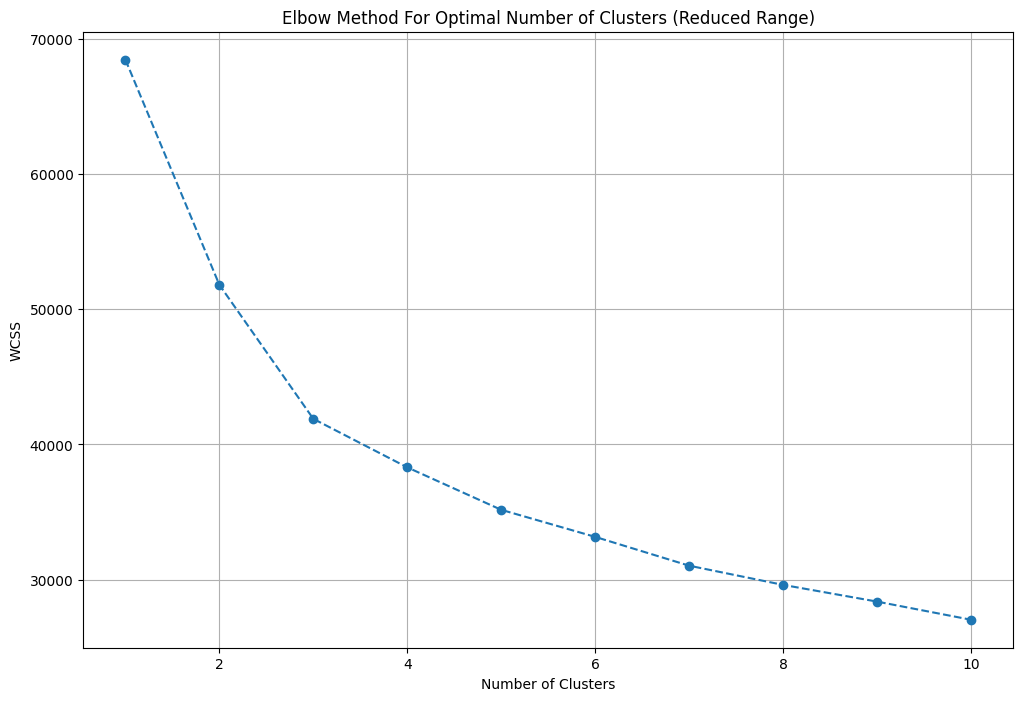

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [49]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3251,NaN,1
2327,NaN,1
2568,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2991,NaN,1
61,NaN,1


## 5.features

In [50]:
df[['society','features']].sample(5)

,society,features
93,bptp terra,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2103,m3m golfestate,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3642,signature global the millennia,NaN
2445,chd avenue,NaN
3647,antriksh heights,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [51]:
df['features'].isnull().sum()

635

In [52]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [53]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [54]:
temp_df = df[df['features'].isnull()]

In [55]:
temp_df.shape

(635, 26)

In [56]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [57]:
df.loc[temp_df.index,'features'] = x.values

In [58]:
df['features'].isnull().sum()

481

In [59]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [60]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [61]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2670,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2274,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
3501,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3667,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
features_binary_df.shape

(3803, 130)

In [63]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

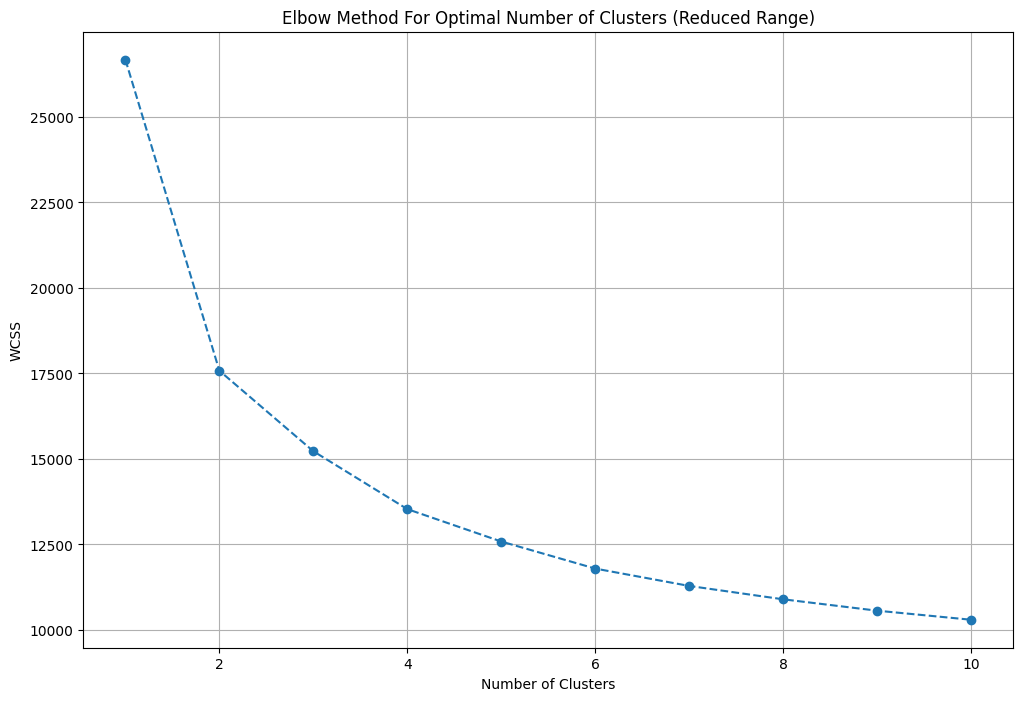

In [64]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [65]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [66]:
df['luxury_score'] = luxury_score

In [67]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,emaar mgf emerald floors premier,sector 65,2.85,14430.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3,"servant room,study room",3.0,North,Relatively New,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']",NaN,NaN,1975.0,1,1,0,0,0,1,"[Intercom Facility, Lift(s), Maintenance Staff, Park, Visitor Parking]",28
1,flat,g l s arawali homes,sohna road,0.26,4513.0,576.0,Super Built up area 576(53.51 sq.m.),2,2,2,not available,1.0,NaN,Moderately Old,NaN,[],NaN,576.0,NaN,NaN,0,0,0,0,0,1,[],0
2,flat,smart world orchard,sector 61,2.30,14110.0,1630.0,Super Built up area 1630(151.43 sq.m.),3,3,2,study room,2.0,NaN,Under Construction,"['Sector 55-56 Metro station', 'Bestech Central Square Mall', 'Golf Course Ext Road', 'Badshahpur Sohna Rd Hwy', 'ORCHIDS The International School', 'Sushant University', 'Marengo Asia Hospitals', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station']",NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1630.0,NaN,NaN,1,0,0,0,0,1,"[Security / Fire Alarm, Private Garden / Terrace, Intercom Facility, Lift(s), No open drainage around, Visitor Parking, Swimming Pool, Park, Security Personnel, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",79
3,flat,mapsko casa bella,sector 82,1.25,6377.0,1960.0,Super Built up area 1960(182.09 sq.m.),3,4,3+,not available,8.0,NaN,Under Construction,"['Vatika City Centre Mall', 'Pataudi Road', 'Broadways International School', 'DPG Institute of Technology', 'Aarvy Healthcare', 'Indira Gandhi International Airport', 'Sultanpur National Park', 'Imt Manesar', 'Holiday Inn Gurugram', 'SkyJumper Trampoline Park', 'HUDA Mini Golf Course']",[],"['Swimming Pool', 'Pergola', 'Sauna', 'Spa', 'Grocery Shop', 'Squash Court', 'Gazebo', 'Fountain', 'Shopping Centre']",1960.0,NaN,NaN,0,0,0,0,0,1,"[Swimming Pool, Pergola, Sauna, Spa, Grocery Shop, Squash Court, Gazebo, Fountain, Shopping Centre]",54
4,house,dlf new town heights,sector 91,2.50,7058.0,3542.0,Plot area 3400(315.87 sq.m.),4,4,3+,"pooja room,study room,servant room,store room",3.0,East,Moderately Old,"['MG Road Metro Station', 'RHM Public School', 'Sanjeevani Hospital', 'IGI Airport', 'Garhi Harsaru Junction', 'Spaze Business Park', 'Orchid Business Park', 'KLAY Play School']","['2 Bed', '7 Wardrobe', '9 Fan', '1 Exhaust Fan', '3 Geyser', '14 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,3400.0,NaN,1,1,1,1,0,2,"[Feng Shui / Vaastu Compliant, Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around

In [68]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [69]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3298,house,independent,sector 57,4.75,28787.0,1650.0,Plot area 1600(148.64 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),3,3,3,2.0,North-West,Moderately Old,NaN,1700.0,1650.0,0,0,1,0,0,2,96
2177,flat,paras dews,sector 106,1.00,7220.0,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up area: 940 sq.ft. (87.33 sq.m.)Carpet area: 845 sq.ft. (78.5 sq.m.),2,2,3+,2.0,North-East,New Property,1385.0,940.0,845.0,0,0,0,0,0,2,21
558,flat,apna enclave,sector 3,0.55,5789.0,950.0,Super Built up area 950(88.26 sq.m.)Built Up area: 900 sq.ft. (83.61 sq.m.)Carpet area: 744 sq.ft. (69.12 sq.m.),2,2,2,2.0,North-East,Old Property,950.0,900.0,744.0,0,0,0,0,0,1,66
989,flat,bestech park view city,sector 48,1.78,10022.0,1776.0,Super Built up area 1776(165 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),3,4,2,5.0,NaN,Relatively New,1776.0,NaN,1300.0,1,0,0,1,0,1,53
2600,house,independent,sector 4,1.25,78125.0,160.0,Built Up area: 160 (14.86 sq.m.),2,3,0,1.0,NaN,Undefined,NaN,160.0,NaN,0,0,0,0,0,1,0


In [70]:
df.shape

(3803, 23)

In [71]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)